In [1]:
options(warn=-1)
library(dplyr)
library(Seurat)
library(SeuratWrappers)
library(tidyverse)
library(RColorBrewer)
library(patchwork)
library(wesanderson)
library(pheatmap)
library(ggrepel)
library(ggplot2)
library(reshape2)
library(Hmisc)
library(DESeq2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0          ✔ readr     2.1.4     
✔ ggplot2   3.5.0.9000     ✔ stringr   1.5.1     
✔ lubridate 1.9.3          ✔ tibble    3.2.1     
✔ purrr     1.0.2          ✔ tidyr     1.3.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘Hmisc’


The following object is masked from ‘package:SeuratObject’:

    Key


The following object is masked fr

In [2]:
readRDS('RDS/PC_lnc_paired.rds')->paired

In [3]:
paired <-  (paired)
paired <- FindVariableFeatures(paired, selection.method = "vst", nfeatures = 2000)

In [4]:
all.genes <- rownames(paired)

In [11]:
read.table('Meta/lnc_nonol.list',header=F)$V1->lnc.allgenes

In [52]:
read.table('Meta/pc.list',header=F)$V1->pc.allgenes

In [12]:
all.genes[which(all.genes %in% lnc.allgenes)]->lnc.genes

In [53]:
all.genes[which(all.genes %in% pc.allgenes)]->pc.genes

In [13]:
length(lnc.allgenes)

[1] 80391

In [14]:
length(lnc.genes)

[1] 53560

In [15]:
length(all.genes)

[1] 83614

In [54]:
length(pc.genes)

[1] 18104

In [18]:
paired <- ScaleData(paired, features = lnc.genes)
paired <- RunPCA(paired, features = VariableFeatures(object = paired), verbose=F)
paired <- FindNeighbors(paired, dims = 1:30)
paired <- FindClusters(paired, resolution = 0.5)
paired <- RunUMAP(paired, dims = 1:30,verbose=F)

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 113283
Number of edges: 3907506

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9141
Number of communities: 25
Elapsed time: 87 seconds


1 singletons identified. 24 final clusters.



In [19]:
paired@assays$RNA@scale.data->scaled

In [20]:
paired@assays$RNA@counts->counts

In [21]:
paired@assays$RNA@data->data

In [22]:
subset.matrix <- counts[lnc.genes, ] 

In [46]:
subset.matrix[which(rowSums(subset.matrix)>0),]->expressed_counts

In [47]:
dim(expressed_counts)

[1]  53247 113283

In [35]:
lnc <- CreateSeuratObject(subset.matrix)

In [36]:
lnc@assays$RNA@data<-data[lnc.genes, ] 
lnc@assays$RNA@scale.data<-scaled[lnc.genes, ] 

In [37]:
lnc

An object of class Seurat 
53560 features across 113283 samples within 1 assay 
Active assay: RNA (53560 features, 0 variable features)

In [38]:
colnames(paired@meta.data)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "czi.ident"      
 [5] "Age"             "Gender"          "Site"            "celltype"       
 [9] "Pt"              "RNA_snn_res.0.5" "seurat_clusters"

In [39]:
orig.ident <- paired@meta.data[,c(1,4,5,6,7,8,9)]

In [40]:
lnc <- AddMetaData(object = lnc, metadata = orig.ident) 

In [42]:
median(lnc$nFeature_RNA)

[1] 323

In [45]:
median(lnc$nCount_RNA)

[1] 1284

In [51]:
mean(lnc$nFeature_RNA)

[1] 397.7293

In [49]:
mean(lnc$nCount_RNA)

[1] 1601.758

In [55]:
pc.matrix <- counts[pc.genes, ] 

In [56]:
pc.matrix[which(rowSums(pc.matrix)>0),]->expressed_pc_counts

In [57]:
dim(expressed_pc_counts)

[1]  18088 113283

In [58]:
pc <- CreateSeuratObject(pc.matrix)

In [59]:
median(pc$nCount_RNA)
median(pc$nFeature_RNA)
mean(pc$nCount_RNA)
mean(pc$nFeature_RNA)

[1] 13098

[1] 3794

[1] 15322.57

[1] 3942.333

In [76]:
DefaultAssay(lnc)<-'RNA'

In [77]:
lnc <- FindVariableFeatures(lnc, selection.method = "vst", nfeatures = 2000)

In [78]:
lnc <- RunPCA(lnc, features = VariableFeatures(object = lnc), verbose=F)
lnc <- FindNeighbors(lnc, dims = 1:30)
lnc <- FindClusters(lnc, resolution = 0.1)
lnc <- RunUMAP(lnc, dims = 1:30,verbose=F)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 113283
Number of edges: 3917463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9621
Number of communities: 14
Elapsed time: 78 seconds


4 singletons identified. 10 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



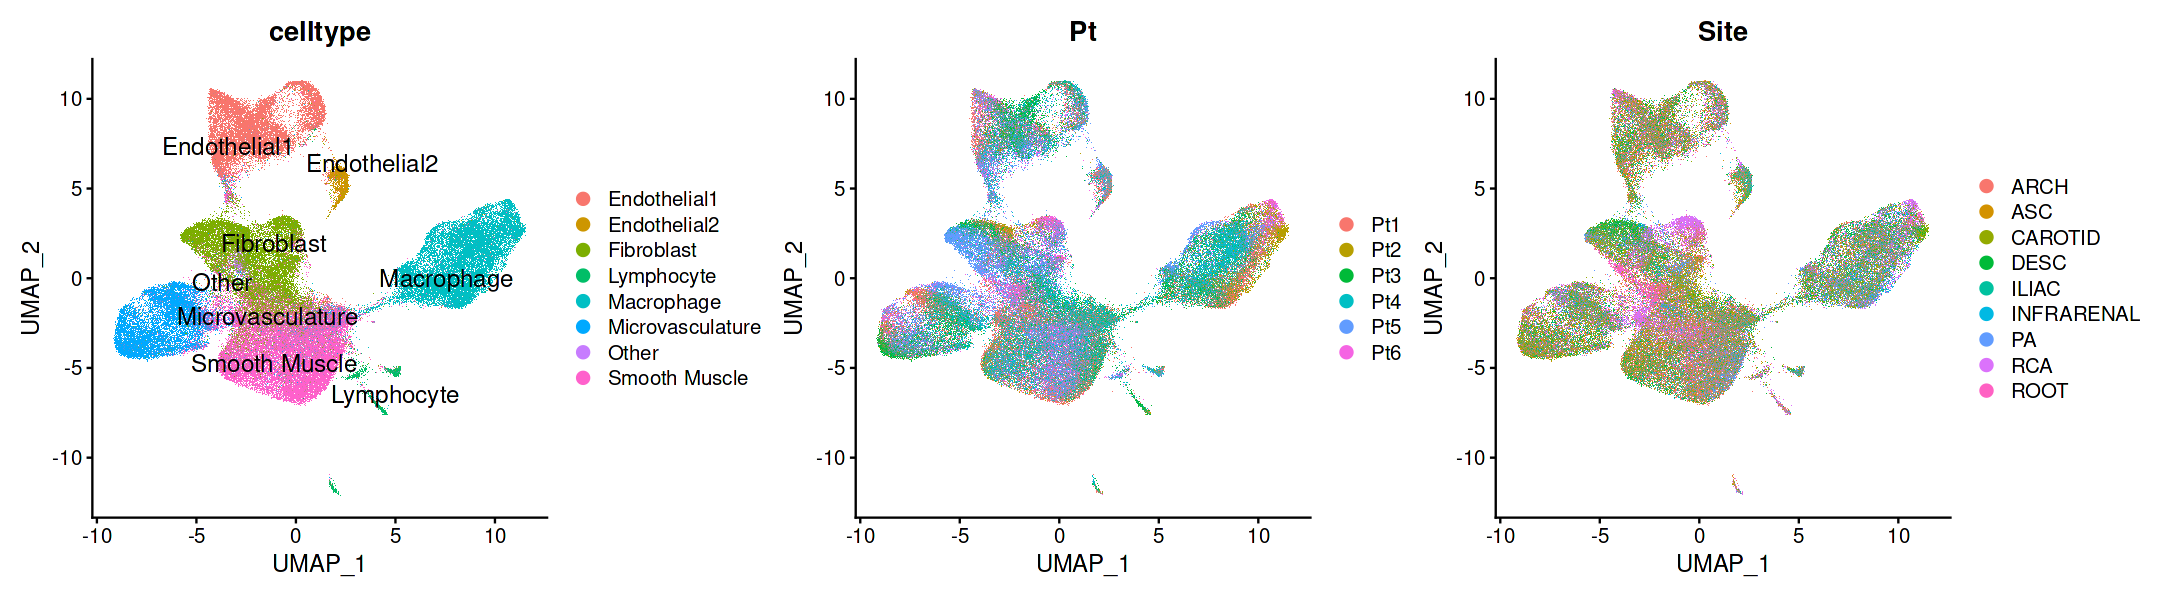

In [79]:
options(repr.plot.width=18, repr.plot.height=5)
DimPlot(lnc, reduction = "umap", group.by = "celltype", label = T, label.size = 5,repel = TRUE)->p1
DimPlot(lnc, reduction = "umap", group.by = "Pt", label = F, repel = TRUE)->p2
DimPlot(lnc, reduction = "umap", group.by = "Site", label = F,repel = TRUE)->p3
p1+p2+p3

In [80]:
lnc.list.rna <- SplitObject(lnc, split.by = "Pt")
lnc.list.rna <- lapply(X = lnc.list.rna, FUN = function(x) {
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})
lnc.rna.features <- SelectIntegrationFeatures(object.list = lnc.list.rna)

In [81]:
lnc.rna.anchors <- FindIntegrationAnchors(object.list = lnc.list.rna, anchor.features = lnc.rna.features)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 16634 anchors

Filtering anchors

	Retained 9453 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 31269 anchors

Filtering anchors

	Retained 13909 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 17713 anchors

Filtering anchors

	Retained 6995 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 35576 anchors

Filtering anchors

	Retained 14488 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 20005 anchors

Filtering anchors

	Retained 7002 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 37693 anchors

Filtering anchors

	Retained 16099 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 31970 anchors

Filtering anchors

	Retain

In [82]:
lnc.integrated.rna <- IntegrateData(anchorset = lnc.rna.anchors)

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 6 into 5

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 into 5 6

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 5 6 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 2 into 5 6 4 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [84]:
DefaultAssay(lnc.integrated.rna) <- "integrated"
lnc.integrated.rna <- ScaleData(lnc.integrated.rna, verbose = FALSE)
lnc.integrated.rna <- RunPCA(lnc.integrated.rna, npcs = 30, verbose = FALSE)
lnc.integrated.rna <- FindNeighbors(lnc.integrated.rna, reduction = "pca", dims = 1:30,verbose = FALSE)
lnc.integrated.rna <- FindClusters(lnc.integrated.rna, resolution = 0.1)
lnc.integrated.rna <- RunUMAP(lnc.integrated.rna, reduction = "pca", dims = 1:30,verbose = FALSE)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 113283
Number of edges: 4852321

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9675
Number of communities: 9
Elapsed time: 68 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



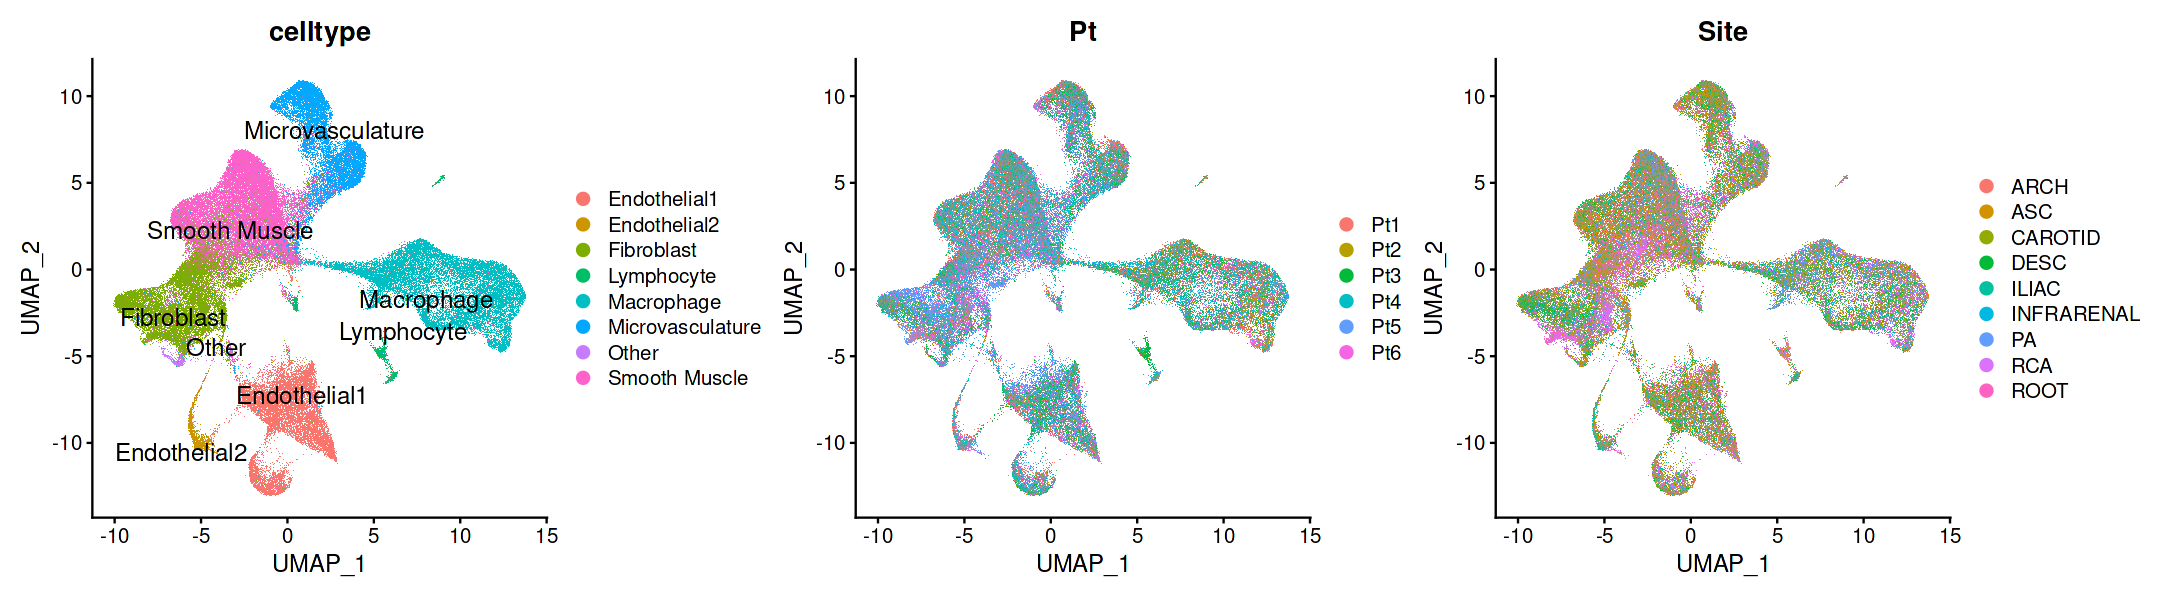

In [85]:
options(repr.plot.width=18, repr.plot.height=5)
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "celltype", label = T, label.size = 5,repel = TRUE)->p1
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "Pt", label = F, repel = TRUE)->p2
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "Site", label = F,repel = TRUE)->p3
p1+p2+p3

In [86]:
saveRDS(lnc.integrated.rna, 'RDS/lnc_only_int_rna.rds')

In [68]:
lnc<-SCTransform(lnc,verbose = F)

In [69]:
lnc <- RunPCA(lnc, verbose=F)
lnc <- FindNeighbors(lnc, dims = 1:30)
lnc <- FindClusters(lnc, resolution = 0.1)
lnc <- RunUMAP(lnc, dims = 1:30,verbose=F)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 113283
Number of edges: 4054567

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9692
Number of communities: 13
Elapsed time: 67 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



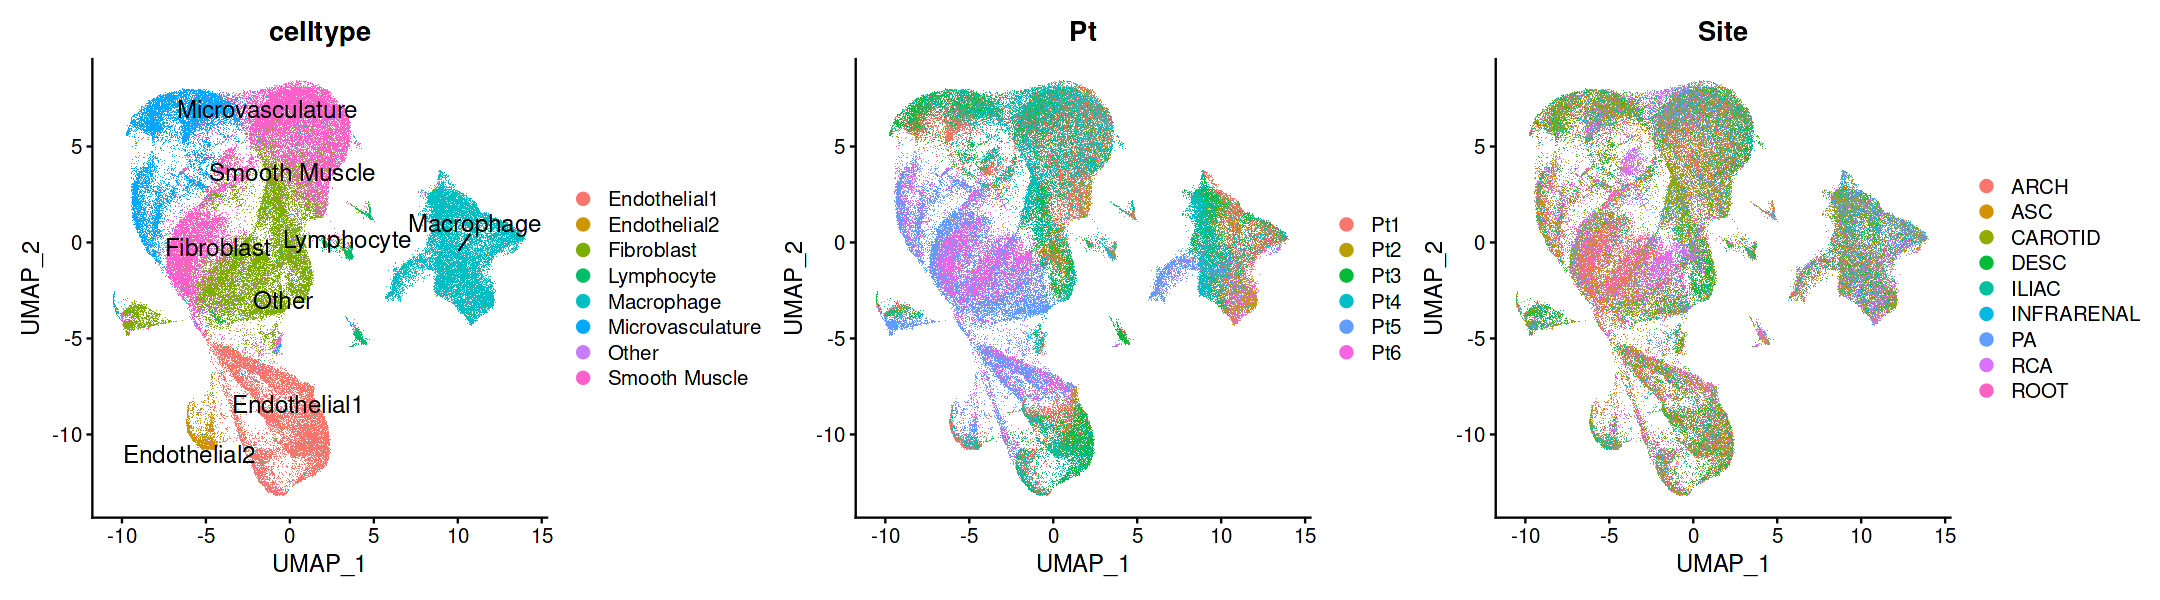

In [70]:
options(repr.plot.width=18, repr.plot.height=5)
DimPlot(lnc, reduction = "umap", group.by = "celltype", label = T, label.size = 5,repel = TRUE)->p1
DimPlot(lnc, reduction = "umap", group.by = "Pt", label = F, repel = TRUE)->p2
DimPlot(lnc, reduction = "umap", group.by = "Site", label = F,repel = TRUE)->p3
p1+p2+p3

In [71]:
saveRDS(lnc, 'RDS/lnc_only.rds')

In [72]:
lnc.list <- SplitObject(lnc, split.by = "Pt")

In [73]:
options(future.globals.maxSize = 240000 * 1024^2)
for (i in 1:length(lnc.list)) {
    lnc.list[[i]] <- SCTransform(lnc.list[[i]], verbose = FALSE)
}

In [74]:
lnc.features <- SelectIntegrationFeatures(object.list = lnc.list,verbose=F)
lnc.list <- PrepSCTIntegration(object.list = lnc.list, anchor.features = lnc.features,verbose = FALSE)
lnc.anchors <- FindIntegrationAnchors(object.list = lnc.list, normalization.method = "SCT", 
                                         anchor.features = lnc.features, verbose = FALSE)
lnc.integrated <- IntegrateData(anchorset = lnc.anchors, normalization.method = "SCT", verbose = FALSE)

In [87]:
DefaultAssay(lnc.integrated) <- "integrated"
lnc.integrated <- ScaleData(lnc.integrated, verbose = FALSE)
lnc.integrated <- RunPCA(lnc.integrated, npcs = 30, verbose = FALSE)
lnc.integrated <- FindNeighbors(lnc.integrated, reduction = "pca", dims = 1:30,verbose = FALSE)
lnc.integrated <- FindClusters(lnc.integrated, resolution = 0.1)
lnc.integrated <- RunUMAP(lnc.integrated, reduction = "pca", dims = 1:30,verbose = FALSE)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 113283
Number of edges: 4844712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9696
Number of communities: 9
Elapsed time: 56 seconds


1 singletons identified. 8 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



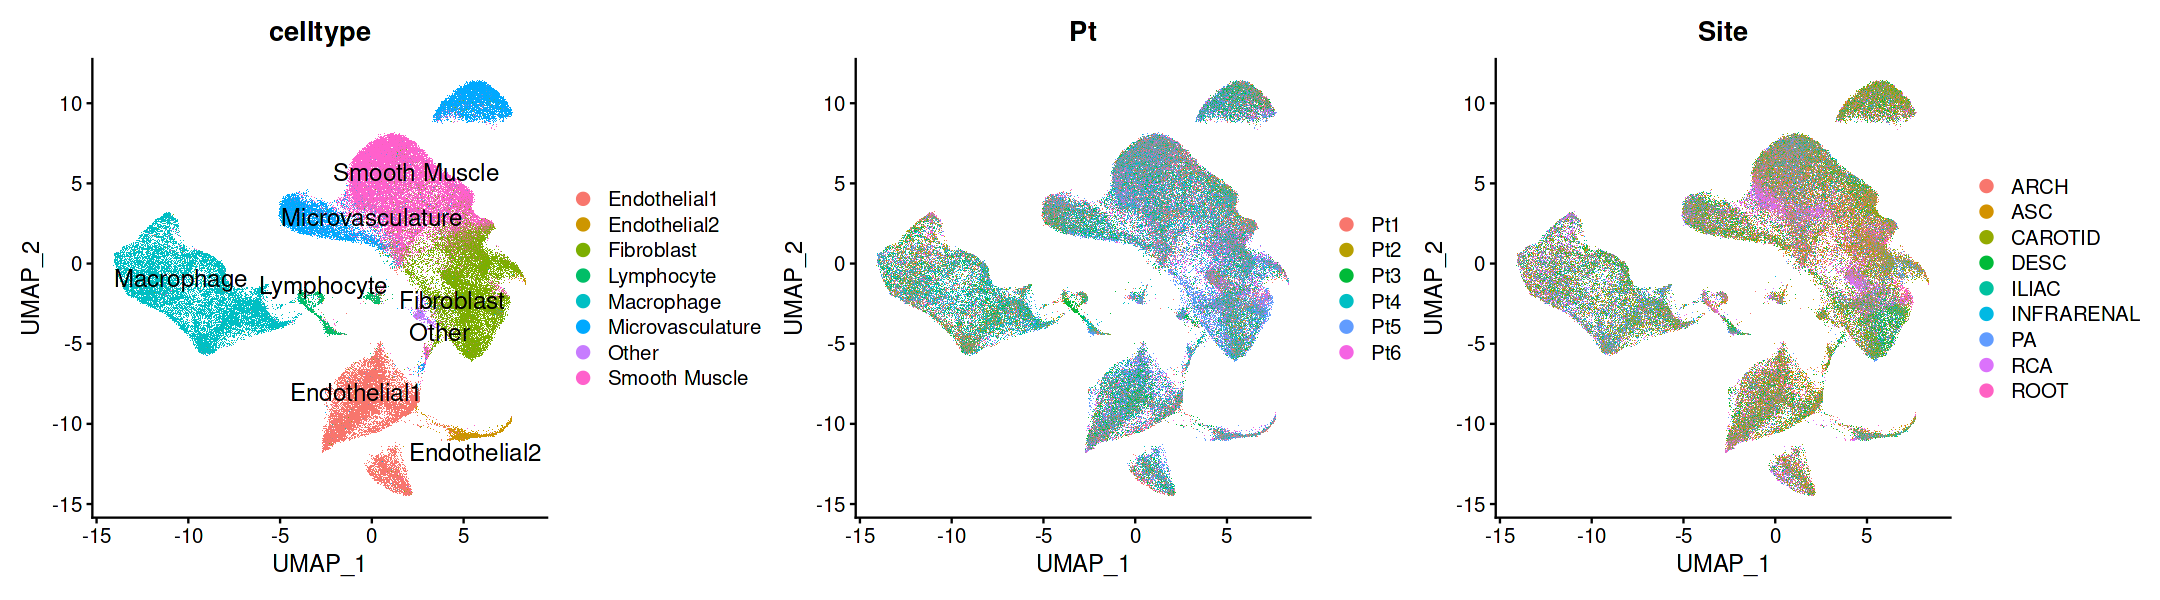

In [88]:
options(repr.plot.width=18, repr.plot.height=5)
DimPlot(lnc.integrated, reduction = "umap", group.by = "celltype", label = T, label.size = 5,repel = TRUE)->p1
DimPlot(lnc.integrated, reduction = "umap", group.by = "Pt", label = F, repel = TRUE)->p2
DimPlot(lnc.integrated, reduction = "umap", group.by = "Site", label = F,repel = TRUE)->p3
p1+p2+p3

In [90]:
saveRDS(lnc.integrated, 'RDS/lnc_only_int.rds')

In [2]:
readRDS('RDS/lnc_only_int_rna.rds')->lnc.integrated.rna

In [3]:
lnc.integrated

ERROR: Error: object 'lnc.integrated' not found


In [ ]:
lnc.integrated.rna

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



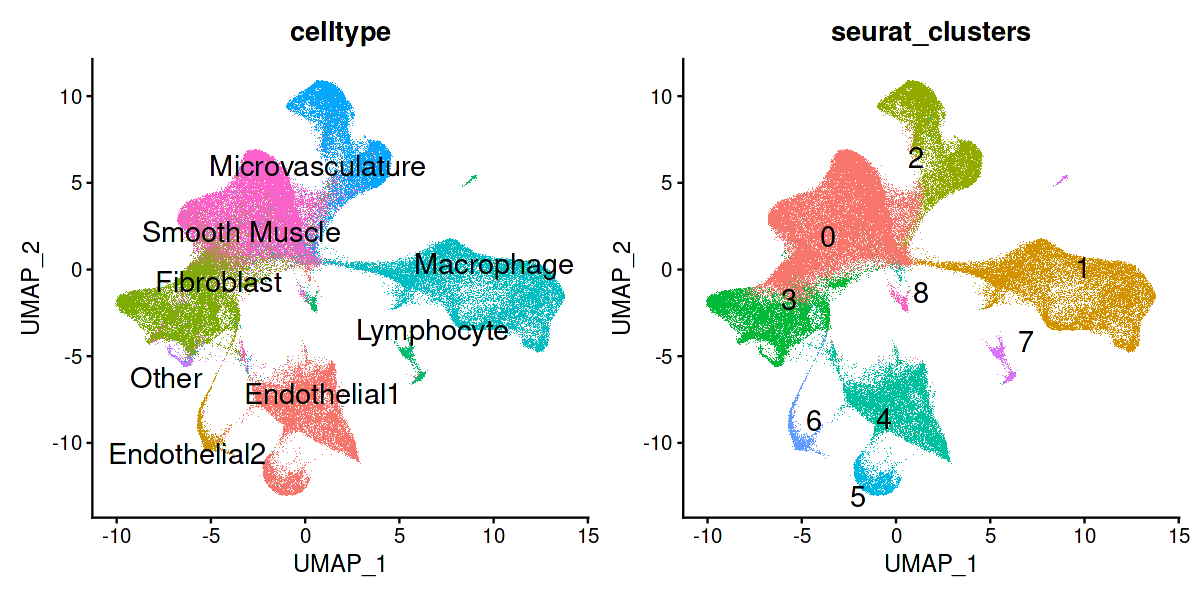

In [18]:
options(repr.plot.width=10, repr.plot.height=5)
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "celltype", label = T, label.size = 6,repel = TRUE)+NoLegend()->p1
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "seurat_clusters", label = T,label.size = 6, repel = TRUE)+NoLegend()->p2
p1+p2

In [102]:
lnc.integrated.rna$celltype->Idents(lnc.integrated.rna)
FindAllMarkers(lnc.integrated.rna,assay = 'RNA',verbose = F)->celltype_marker
write.table(celltype_marker,'Markers/celltype_lnc_mks.txt',sep = '\t',quote=F)
FindAllMarkers(lnc.integrated.rna,assay = 'RNA',verbose = F,test.use = 'DESeq2')->celltype_DEmarker
write.table(celltype_DEmarker,'Markers/celltype_lnc_DEmks.txt',sep = '\t',quote=F)

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode



In [103]:
lnc.integrated.rna$Site->Idents(lnc.integrated.rna)
FindAllMarkers(lnc.integrated.rna,assay = 'RNA',verbose = F)->site_marker
write.table(site_marker,'Markers/site_lnc_mks.txt',sep = '\t',quote=F)
FindAllMarkers(lnc.integrated.rna,assay = 'RNA',verbose = F,test.use = 'DESeq2')->site_DEmarker
write.table(site_DEmarker,'Markers/site_lnc_DEmks.txt',sep = '\t',quote=F)

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode

converting counts to integer mode



In [8]:
read.table('Markers/lnc/site_lnc_mks.txt',sep = '\t',header=T)->site_marker
read.table('Markers/lnc/celltype_lnc_mks.txt',sep = '\t',header=T)->celltype_marker

In [104]:
AverageExpression(lnc.integrated.rna,features = celltype_marker$gene,group.by = 'celltype')$RNA->celltype_exp

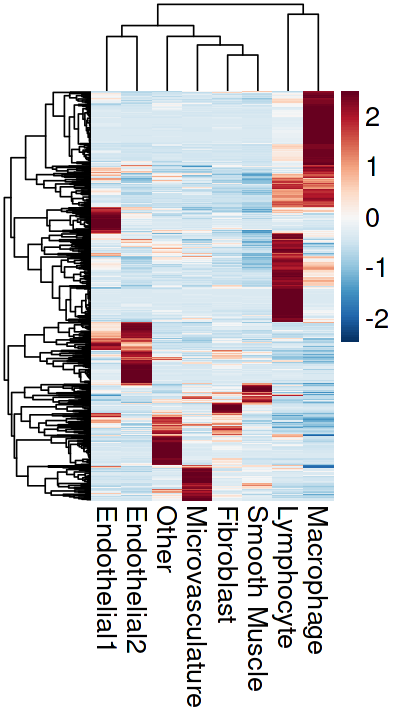

In [119]:
options(repr.plot.width=3.5, repr.plot.height=6)
pheatmap(celltype_exp,color=colorRampPalette(rev(brewer.pal(11,"RdBu")))(100),scale='row',show_rownames = F,fontsize = 16)

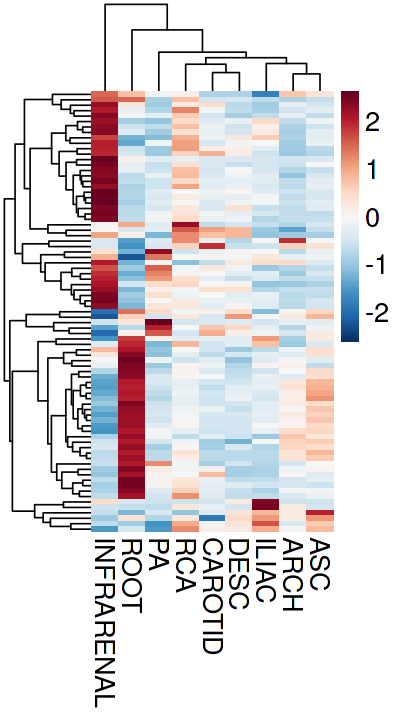

In [36]:
AverageExpression(lnc.integrated.rna,features = site_marker$gene,group.by = 'Site')$RNA->site_exp
options(repr.plot.width=3.5, repr.plot.height=6)
pheatmap(site_exp,color=colorRampPalette(rev(brewer.pal(11,"RdBu")))(100),scale='row',show_rownames = F,fontsize = 16,
         clustering_method = 'complete' ,border_color = NA)

In [6]:
lnc.integrated.rna$seurat_clusters->Idents(lnc.integrated.rna)
cluster.ids <- c("Smooth Muscle", "Macrophage", "Microvasculature", "Fibroblast", "Endothelial1",
                "Endothelial1","Endothelial2","Lymphocyte","Lymphocyte")
names(cluster.ids) <- levels(lnc.integrated.rna)
lnc.integrated.rna <- RenameIdents(lnc.integrated.rna, cluster.ids)
levels(lnc.integrated.rna)<- c( "Endothelial1", "Endothelial2","Fibroblast", "Lymphocyte", "Microvasculature","Smooth Muscle","Macrophage")
lnc.integrated.rna$celltype_lnc<-Idents(lnc.integrated.rna)

In [13]:
lnc.integrated.rna$celltype->Idents(lnc.integrated.rna)
levels(lnc.integrated.rna)
cluster.ids <- c("Smooth Muscle", "Microvasculature", "Fibroblast", "Endothelial1", "Macrophage",
                "Endothelial2","Lymphocyte","Other Mesencyhmal cells")
names(cluster.ids) <- levels(lnc.integrated.rna)
lnc.integrated.rna <- RenameIdents(lnc.integrated.rna, cluster.ids)
levels(lnc.integrated.rna)<- c( "Endothelial1", "Endothelial2","Fibroblast", "Lymphocyte", "Microvasculature","Smooth Muscle","Macrophage", "Other Mesencyhmal cells")
lnc.integrated.rna$celltype<-Idents(lnc.integrated.rna)

[1] "Smooth Muscle"    "Microvasculature" "Fibroblast"       "Endothelial1"    
[5] "Macrophage"       "Endothelial2"     "Lymphocyte"       "Other"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



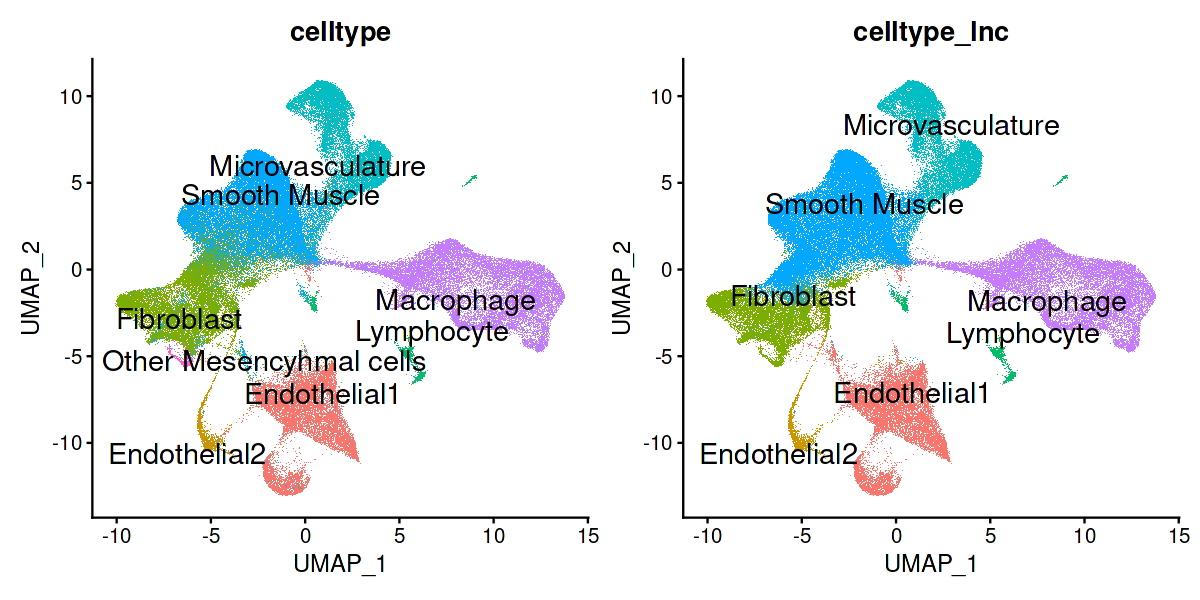

In [8]:
options(repr.plot.width=10, repr.plot.height=5)
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "celltype", label = T, label.size = 6,repel = TRUE)+NoLegend()->p1
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "celltype_lnc", label = T,label.size = 6, repel = TRUE)+NoLegend()+
    scale_color_manual(values=c('#F8766D','#CD9600','#7CAE00','#00BE67','#00BFC4','#00A9FF','#C77CFF'))->p2
p1+p2

In [50]:
write.table(lnc.integrated.rna@meta.data,'Meta/lnc_only.meta0',sep='\t',quote=F)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 113283
Number of edges: 4852321

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9496
Number of communities: 11
Elapsed time: 68 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



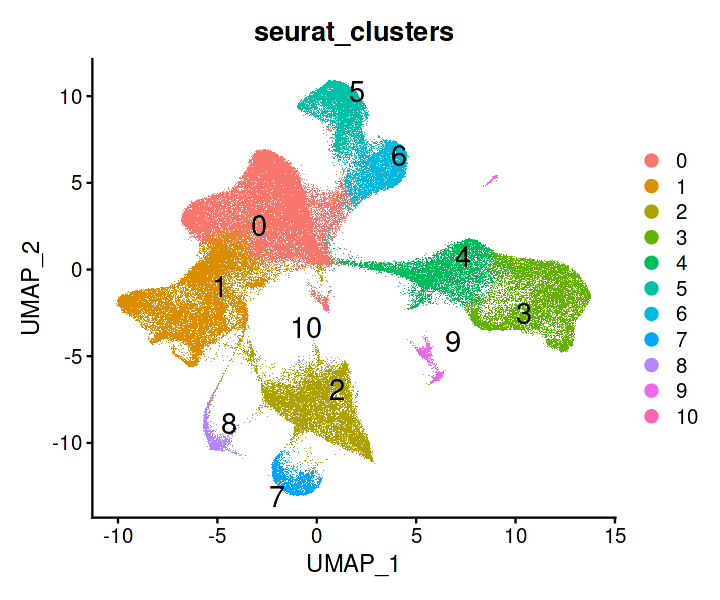

In [4]:
lnc.integrated.rna <- FindClusters(lnc.integrated.rna, resolution = 0.2)
options(repr.plot.width=6, repr.plot.height=5)
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "seurat_clusters", label = T,label.size = 6, repel = TRUE)

In [5]:
lnc.integrated.rna$seurat_clusters->Idents(lnc.integrated.rna)
levels(lnc.integrated.rna)
cluster.ids <- c("Smooth Muscle", "Fibroblast", "Endothelial1", "Macrophage", "Macrophage","Microvasculature",
                "Microvasculature","Endothelial1","Endothelial2","Lymphocyte","Lymphocyte")
names(cluster.ids) <- levels(lnc.integrated.rna)
lnc.integrated.rna <- RenameIdents(lnc.integrated.rna, cluster.ids)
levels(lnc.integrated.rna)<- c( "Endothelial1", "Endothelial2","Fibroblast", "Lymphocyte", "Microvasculature","Smooth Muscle","Macrophage")
lnc.integrated.rna$celltype_lnc2<-Idents(lnc.integrated.rna)

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



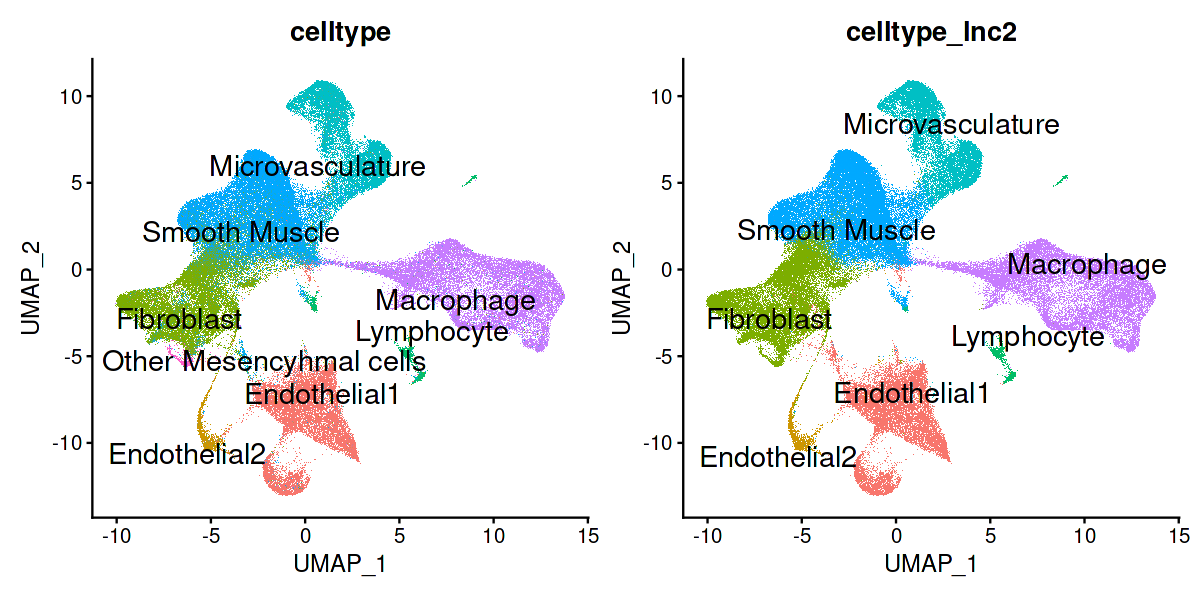

In [11]:
options(repr.plot.width=10, repr.plot.height=5)
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "celltype", label = T, label.size = 6,repel = TRUE)+NoLegend()->p1
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "celltype_lnc2", label = T,label.size = 6, repel = TRUE)+NoLegend()+
    scale_color_manual(values=c('#F8766D','#CD9600','#7CAE00','#00BE67','#00BFC4','#00A9FF','#C77CFF'))->p2
p1+p2

In [7]:
levels(lnc.integrated.rna)

[1] "Endothelial1"     "Endothelial2"     "Fibroblast"       "Lymphocyte"      
[5] "Microvasculature" "Smooth Muscle"    "Macrophage"

In [12]:
levels(lnc.integrated.rna$celltype)

NULL

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



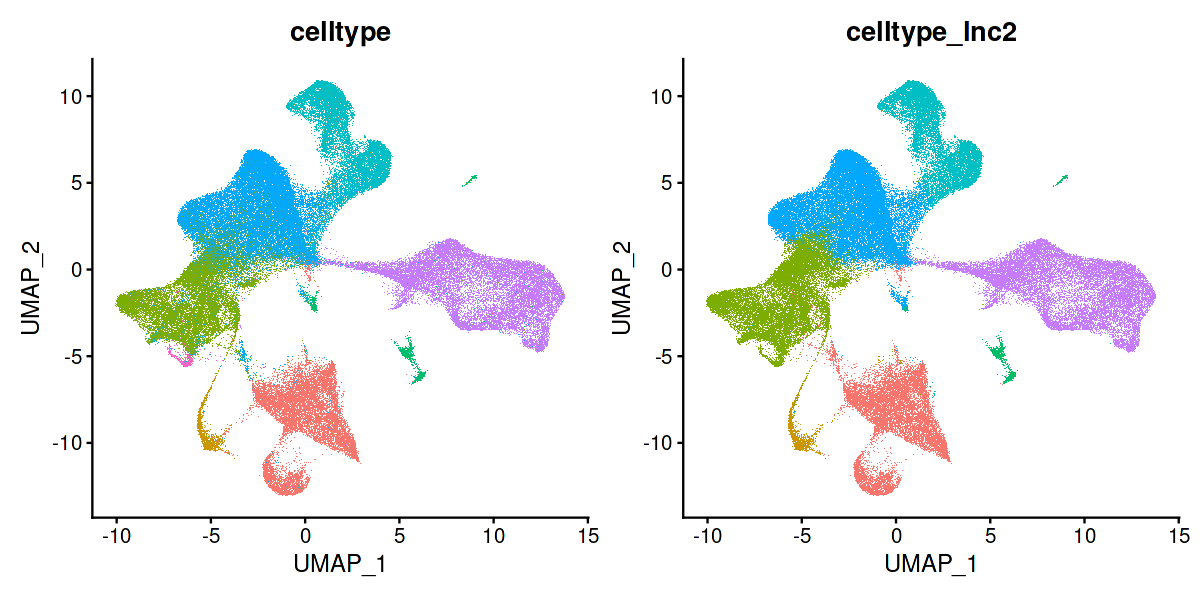

In [14]:
options(repr.plot.width=10, repr.plot.height=5)
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "celltype", label = F, label.size = 6,repel = TRUE)+NoLegend()->p1
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "celltype_lnc2", label = F,label.size = 6, repel = TRUE)+NoLegend()+
    scale_color_manual(values=c('#F8766D','#CD9600','#7CAE00','#00BE67','#00BFC4','#00A9FF','#C77CFF'))->p2
p1+p2

In [4]:
read.table('Meta/lnc_only.diff',header=F,row.names = 1)->diff
AddMetaData(lnc.integrated.rna,metadata = diff,col.name = 'diff')->lnc.integrated.rna

In [5]:
unique(lnc.integrated.rna$diff)
lnc.integrated.rna$diff->Idents(lnc.integrated.rna)

[1] "Same" "Diff"

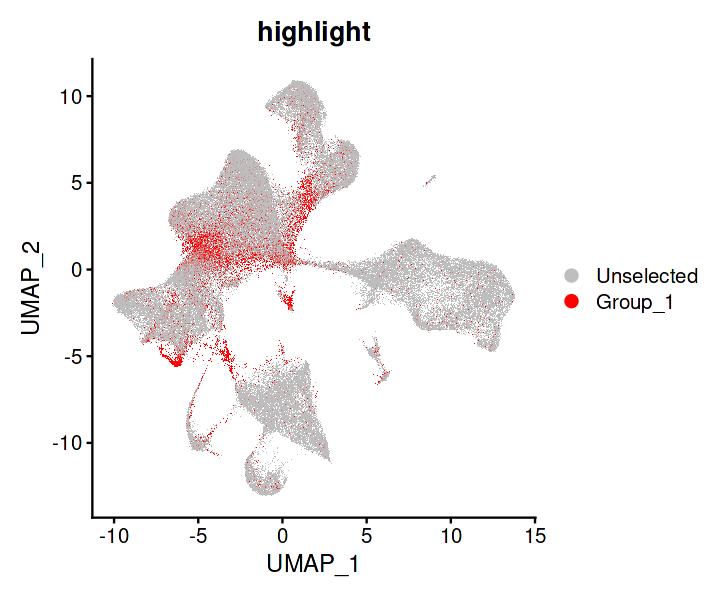

In [6]:
options(repr.plot.width=6, repr.plot.height=5)
DimPlot(lnc.integrated.rna, label=F, group.by="diff", cells.highlight= list( WhichCells(lnc.integrated.rna, idents = 'Diff')),
        cols.highlight =  "red", cols= "grey",raster=T)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 113283
Number of edges: 4852321

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9390
Number of communities: 14
Elapsed time: 55 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



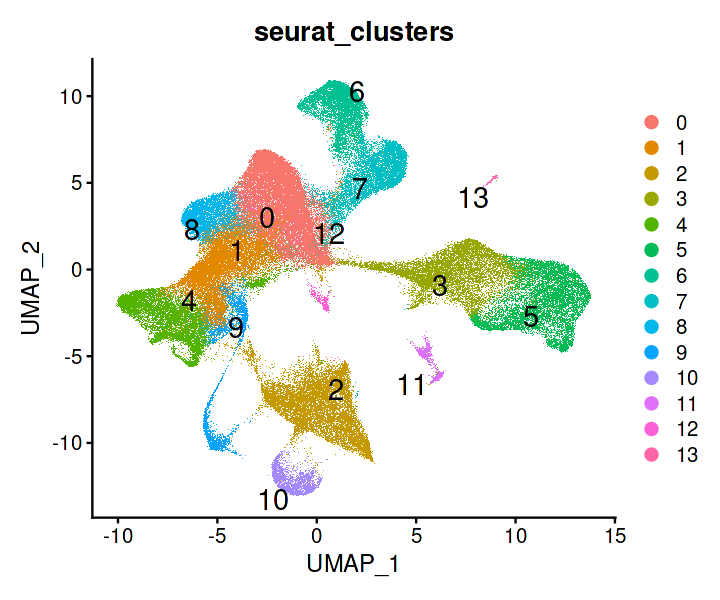

In [28]:
lnc.integrated.rna <- FindClusters(lnc.integrated.rna, resolution = 0.3)
options(repr.plot.width=6, repr.plot.height=5)
DimPlot(lnc.integrated.rna, reduction = "umap", group.by = "seurat_clusters", label = T,label.size = 6, repel = TRUE)

In [7]:
gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

In [8]:
cols = gg_color_hue(8)

In [9]:
cols

[1] "#F8766D" "#CD9600" "#7CAE00" "#00BE67" "#00BFC4" "#00A9FF" "#C77CFF"
[8] "#FF61CC"

In [42]:
levels(lnc.integrated.rna)

[1] "Endothelial1"     "Endothelial2"     "Fibroblast"       "Lymphocyte"      
[5] "Microvasculature" "Smooth Muscle"    "Macrophage"

In [43]:
write.table(lnc.integrated.rna@meta.data,'Meta/lnc_only.meta',sep='\t',quote=F)

In [127]:
lnc.integrated.rna

An object of class Seurat 
104007 features across 113283 samples within 3 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

In [12]:
lnc.integrated.rna$celltype->Idents(lnc.integrated.rna)

In [13]:
subset(lnc.integrated.rna,idents='Fibroblast')->fb
subset(lnc.integrated.rna,idents='Smooth Muscle')->smc 

In [130]:
DefaultAssay(smc)<-'integrated'
smc<-FindVariableFeatures(smc,verbose = F)
smc<-RunPCA(smc,verbose = F)
smc<-FindNeighbors(smc, dims = 1:20,verbose = F)
smc<-RunUMAP(smc, dims = 1:20,verbose = F)

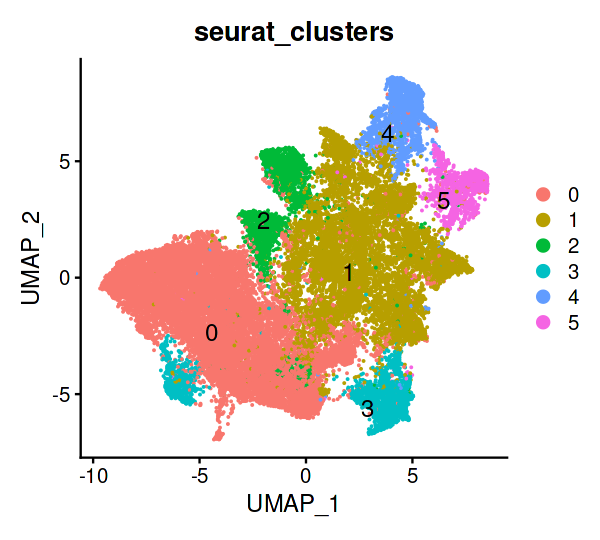

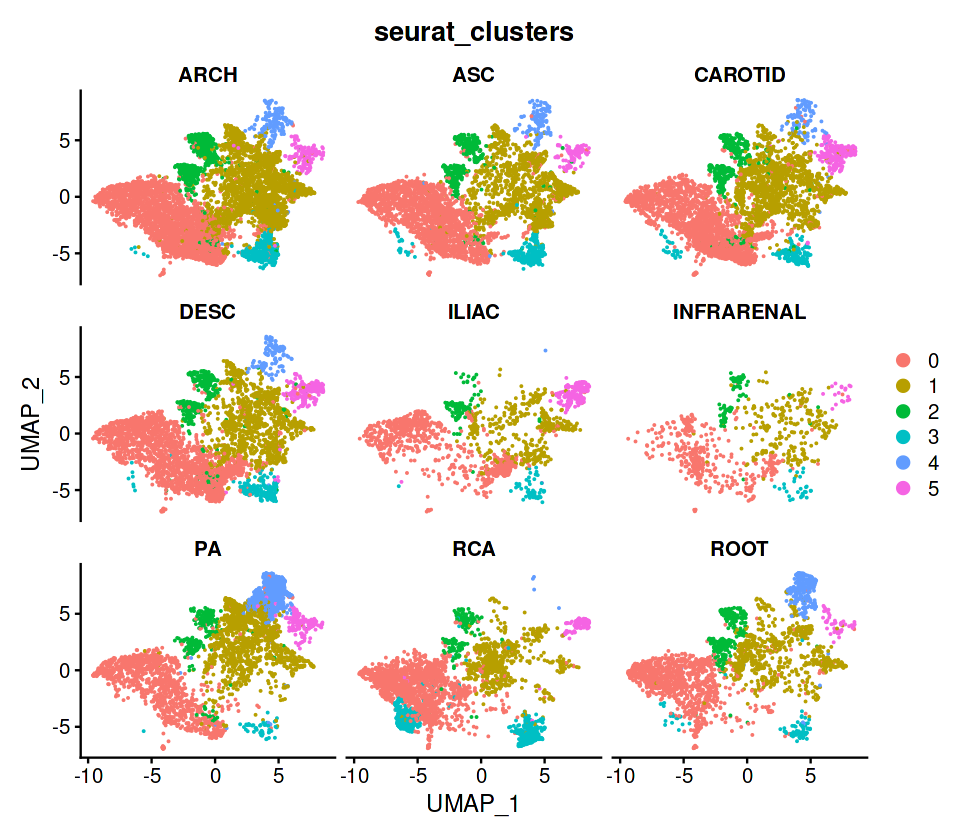

In [139]:
smc<-FindClusters(smc, resolution=0.075, dims = 1:20,verbose = F)
options(repr.plot.width=5, repr.plot.height=4.5)
DimPlot(smc, reduction = "umap", label = T, label.size = 5,repel = TRUE,group.by = 'seurat_clusters')
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(smc, split.by = "Site", ncol = 3,group.by = 'seurat_clusters')

In [14]:
DefaultAssay(fb)<-'integrated'
fb<-FindVariableFeatures(fb,verbose = F)
fb<-RunPCA(fb,verbose = F)
fb<-FindNeighbors(fb, dims = 1:20,verbose = F)
fb<-RunUMAP(fb, dims = 1:20,verbose = F)

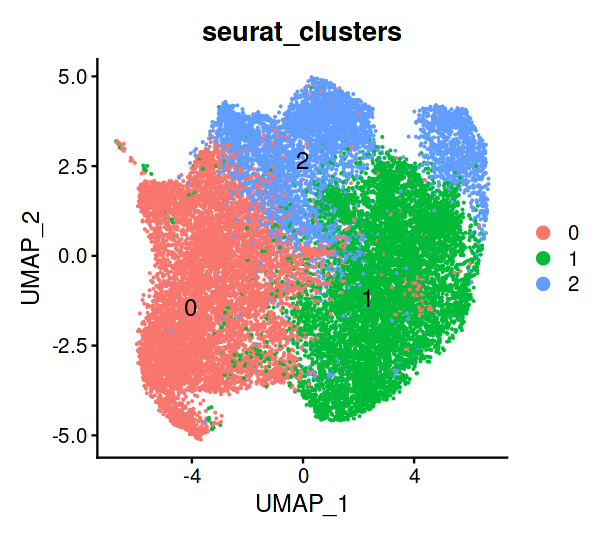

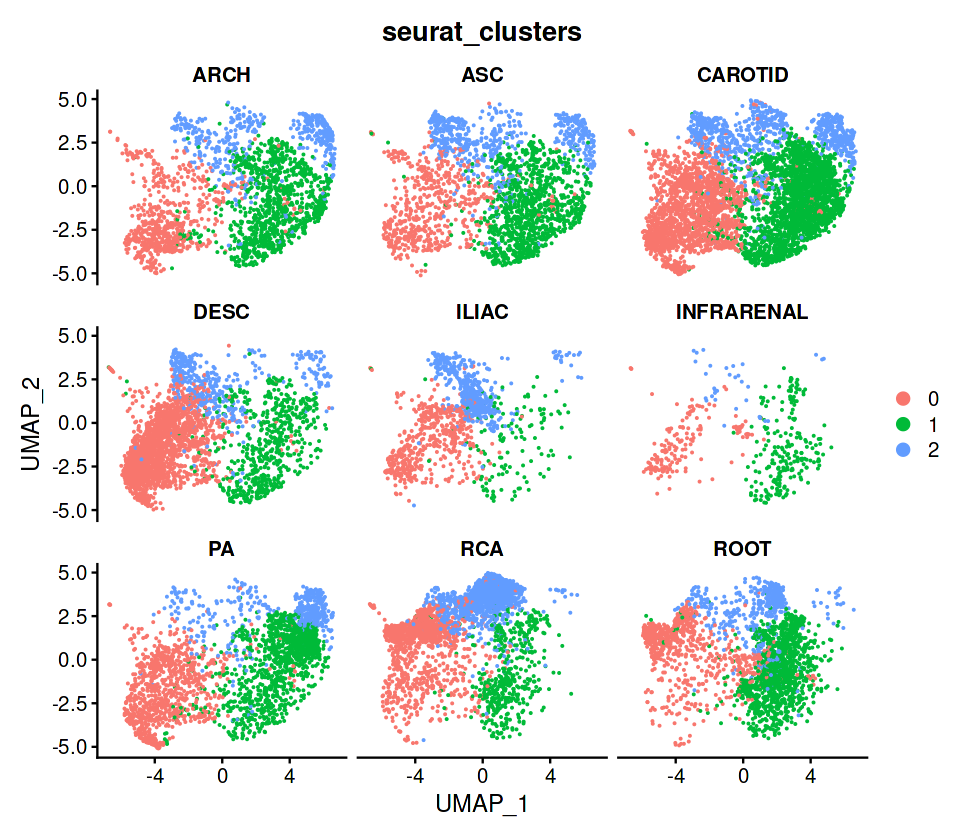

In [15]:
fb<-FindClusters(fb, resolution=0.1, dims = 1:20,verbose = F)
options(repr.plot.width=5, repr.plot.height=4.5)
DimPlot(fb, reduction = "umap", label = T, label.size = 5,repel = TRUE,group.by = 'seurat_clusters')
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(fb, split.by = "Site", ncol = 3,group.by = 'seurat_clusters')

In [16]:
clumks<-function(obj){
    obj$seurat_clusters->Idents(obj)
    FindAllMarkers(obj,assay = 'RNA',only.pos = T,verbose = F)->mks
    return(mks)
}

In [17]:
sitemks<-function(obj){
    obj$Site->Idents(obj)
    FindAllMarkers(obj,assay = 'RNA',only.pos = T,verbose = F)->mks
    return(mks)
}

In [ ]:
sitemks(smc)->smc_sitemk
clumks(smc)->smc_clumk

In [18]:
sitemks(fb)->fb_sitemk
clumks(fb)->fb_clumk

In [19]:
distplot<-function(obj,mks){
    AverageExpression(obj,features = mks$gene,group.by = 'Site')$RNA->exp
    dist<-dist(t(exp), method = "euclidean", diag = TRUE, upper = TRUE, p =2)
    hc_ward <- hclust(dist, method = "complete")
    options(repr.plot.width=5, repr.plot.height=4)
    par(mfrow = c(1,1))
    plot(hc_ward, main = 'complete Linkage')
}

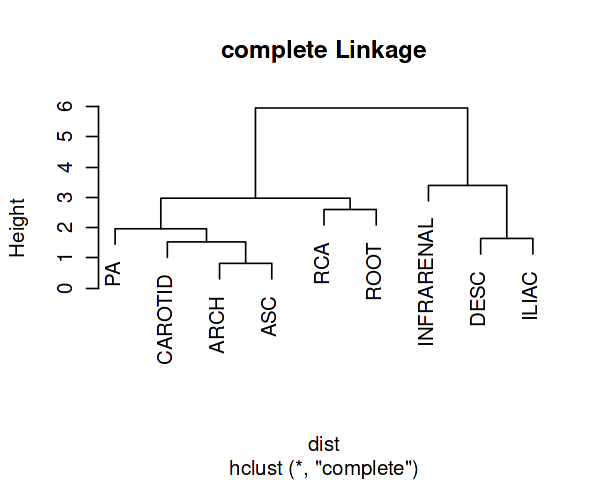

In [150]:
distplot(smc,smc_clumk)

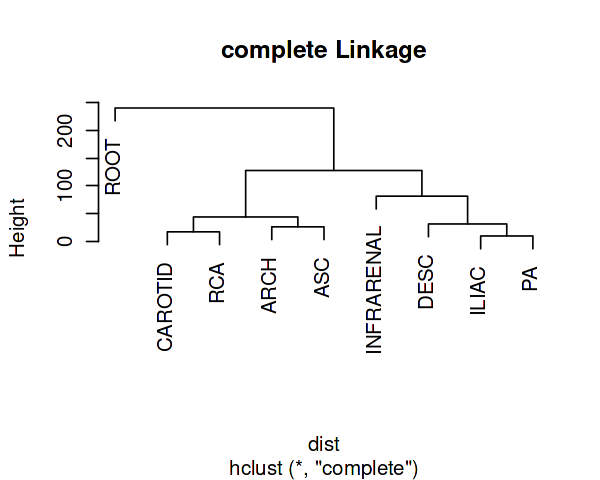

In [151]:
distplot(smc,smc_sitemk)

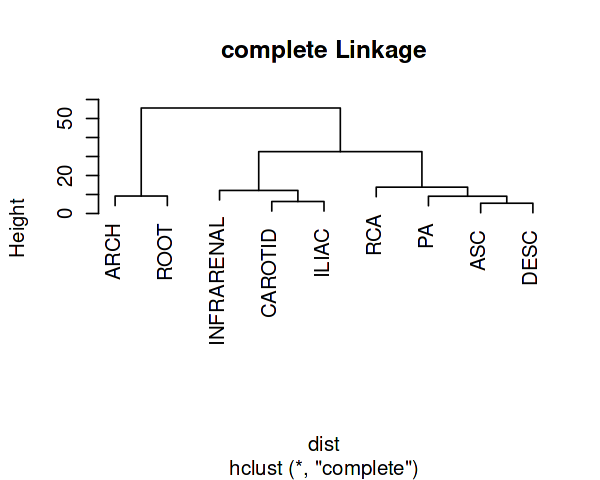

In [22]:
distplot(fb,fb_clumk)

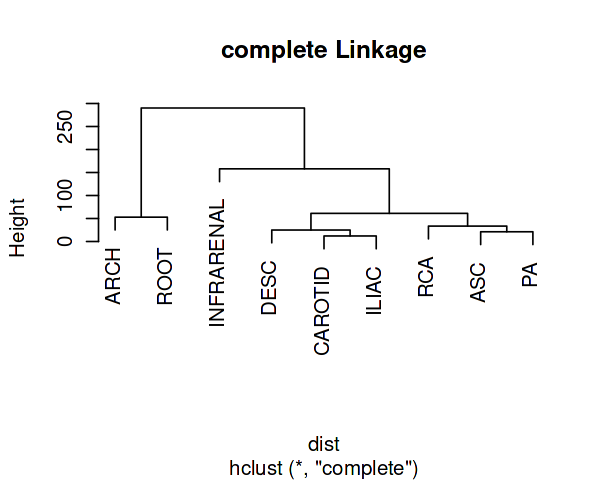

In [23]:
distplot(fb,fb_sitemk)

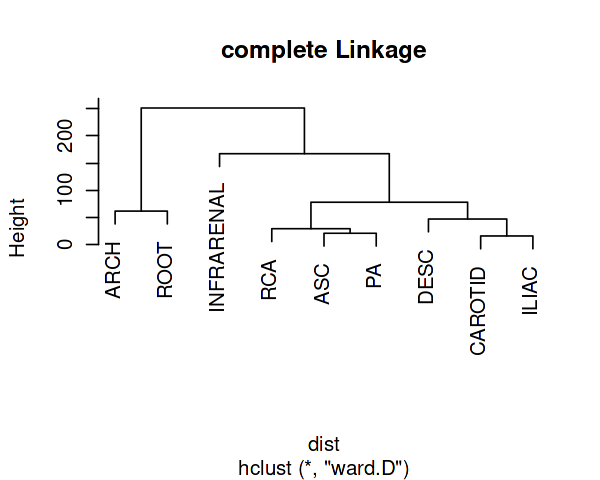

In [34]:
AverageExpression(fb,features = fb_sitemk$gene,group.by = 'Site')$SCT->exp
dist<-dist(t(exp), method = "euclidean", diag = TRUE, upper = TRUE, p =2)
hc_ward <- hclust(dist, method = "ward.D")
options(repr.plot.width=5, repr.plot.height=4)
par(mfrow = c(1,1))
plot(hc_ward, main = 'complete Linkage')

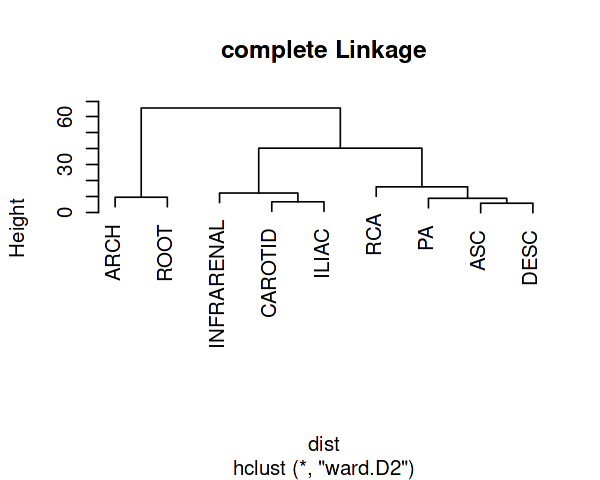

In [36]:
AverageExpression(fb,features = fb_clumk$gene,group.by = 'Site')$RNA->exp
dist<-dist(t(exp), method = "euclidean", diag = TRUE, upper = TRUE, p =2)
hc_ward <- hclust(dist, method = "ward.D2")
options(repr.plot.width=5, repr.plot.height=4)
par(mfrow = c(1,1))
plot(hc_ward, main = 'complete Linkage')

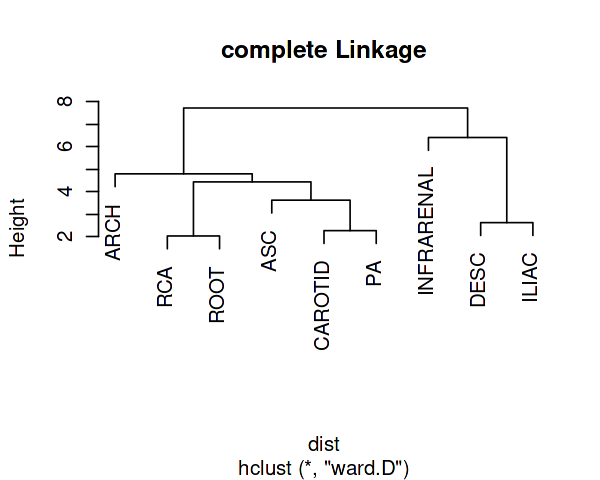

In [30]:
AverageExpression(fb,features = rownames(fb),group.by = 'Site')$RNA->exp
exp[which(rowSums(exp)>0),]->exp
dist<-dist(t(exp), method = "euclidean", diag = TRUE, upper = TRUE, p =2)
hc_ward <- hclust(dist, method = "ward.D")
options(repr.plot.width=5, repr.plot.height=4)
par(mfrow = c(1,1))
plot(hc_ward, main = 'complete Linkage')

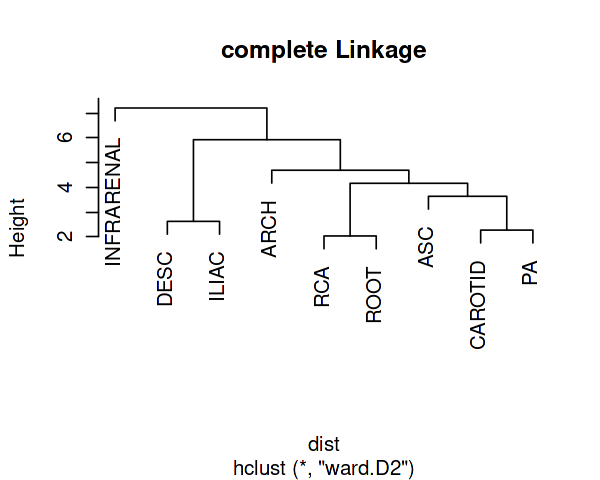

In [32]:
AverageExpression(fb,features = rownames(fb),group.by = 'Site')$RNA->exp
dist<-dist(t(exp), method = "euclidean", diag = TRUE, upper = TRUE, p =2)
hc_ward <- hclust(dist, method = "ward.D2")
options(repr.plot.width=5, repr.plot.height=4)
par(mfrow = c(1,1))
plot(hc_ward, main = 'complete Linkage')

In [173]:
corrplot<-function(obj,mks){
    AverageExpression(obj,features = mks$gene,group.by = 'Site')$RNA->exp
    rcorr(exp)$r->res_exp
    options(repr.plot.width=5, repr.plot.height=5)
    pheatmap(res_exp,color=colorRampPalette(rev(brewer.pal(9,"RdBu")))(100),font_size=18)
}

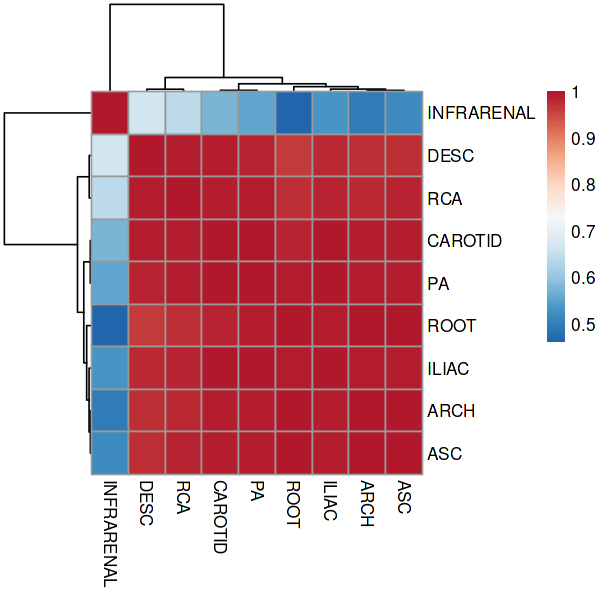

In [174]:
corrplot(fb,fb_sitemk)

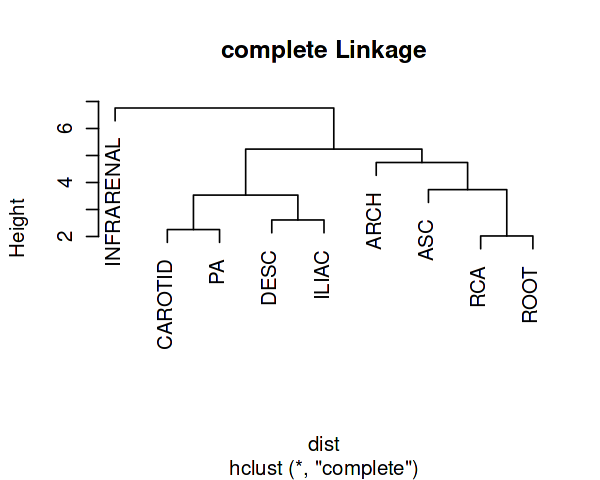

In [179]:
AverageExpression(fb,features =VariableFeatures(fb),group.by = 'Site')$RNA->exp
dist<-dist(t(exp), method = "euclidean", diag = TRUE, upper = TRUE, p =2)
hc_ward <- hclust(dist, method = "complete")
options(repr.plot.width=5, repr.plot.height=4)
par(mfrow = c(1,1))
plot(hc_ward, main = 'complete Linkage')

In [182]:
length(VariableFeatures(fb))

[1] 2000

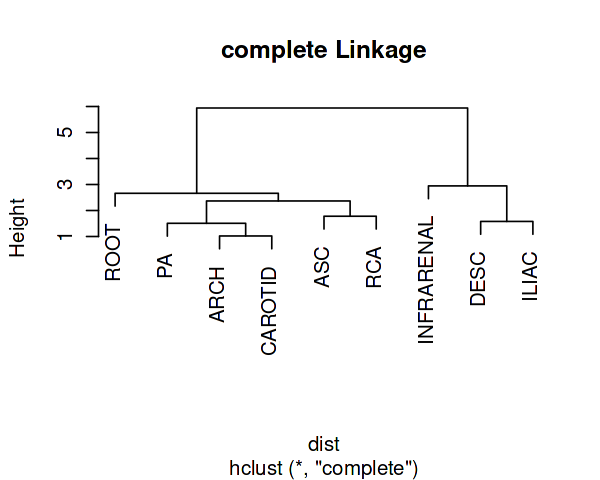

In [183]:
AverageExpression(smc,features =VariableFeatures(fb),group.by = 'Site')$RNA->exp
dist<-dist(t(exp), method = "euclidean", diag = TRUE, upper = TRUE, p =2)
hc_ward <- hclust(dist, method = "complete")
options(repr.plot.width=5, repr.plot.height=4)
par(mfrow = c(1,1))
plot(hc_ward, main = 'complete Linkage')

In [187]:
lnc.integrated.rna$celltype->Idents(lnc.integrated.rna)
subset(lnc.integrated.rna,idents='Endothelial1')->ec1
subset(lnc.integrated.rna,idents='Endothelial2')->ec2
subset(lnc.integrated.rna,idents='Lymphocyte')->lym
subset(lnc.integrated.rna,idents='Microvasculature')->mico
subset(lnc.integrated.rna,idents='Macrophage')->mp

In [188]:
sitemks(ec1)->ec1_sitemk
sitemks(ec2)->ec2_sitemk
sitemks(lym)->lym_sitemk
sitemks(mico)->mico_sitemk
sitemks(mp)->mp_sitemk

In [190]:
ls()

[1] "all.genes"           "celltype_DEmarker"   "celltype_exp"       
 [4] "celltype_marker"     "clumks"              "clumks_de"          
 [7] "cluster.ids"         "corrplot"            "counts"             
[10] "data"                "dist"                "distplot"           
[13] "ec1"                 "ec1_sitemk"          "ec2"                
[16] "ec2_sitemk"          "exp"                 "expressed_counts"   
[19] "expressed_pc_counts" "fb"                  "fb_clumk"           
[22] "fb_clumk_de"         "fb_sitemk"           "hc_ward"            
[25] "i"                   "lnc"                 "lnc.allgenes"       
[28] "lnc.anchors"         "lnc.features"        "lnc.genes"          
[31] "lnc.integrated"      "lnc.integrated.rna"  "lnc.list"           
[34] "lnc.list.rna"        "lnc.rna.anchors"     "lnc.rna.features"   
[37] "lym"                 "lym_sitemk"          "mico"               
[40] "mico_sitemk"         "mp"                  "mp_sitemk"          
[43] "orig.ident"          "p1"                  "p2"                 
[46] "p3"                  "paired"              "pc"                 
[49] "pc.allgenes"         "pc.genes"            "pc.matrix"          
[52] "scaled"              "site_DEmarker"       "site_exp"           
[55] "site_marker"         "sitemks"             "smc"                
[58] "smc_clumk"           "smc_clumk_de"        "smc_sitemk"         
[61] "subset.matrix"

In [194]:
write.table(ec1_sitemk,'Markers/ec1_site_lnc_mk.txt',quote=F,sep='\t')
write.table(ec2_sitemk,'Markers/ec2_site_lnc_mk.txt',quote=F,sep='\t')
write.table(smc_sitemk,'Markers/smc_site_lnc_mk.txt',quote=F,sep='\t')
write.table(mp_sitemk,'Markers/mp_site_lnc_mk.txt',quote=F,sep='\t')
write.table(mico_sitemk,'Markers/micro_site_lnc_mk.txt',quote=F,sep='\t')
write.table(fb_sitemk,'Markers/fb_site_lnc_mk.txt',quote=F,sep='\t')
write.table(lym_sitemk,'Markers/lym_site_lnc_mk.txt',quote=F,sep='\t')

In [3]:
read.table('Markers/lnc/gwas/total_de_exon_MVP.name',header=F,sep='\t')->dat

In [4]:
head(dat)

V1       V2            V3   V4        V5        V6         V7       
1 IL6R-AS1 HSALNG0007394 chr1 154401972 154401973 rs6694817  17.856361
2 IL6R-AS1 HSALNG0007394 chr1 154405024 154405025 rs56383622 20.562091
3 IL6R-AS1 HSALNG0007394 chr1 154401972 154401973 rs6694817  17.856361
4 IL6R-AS1 HSALNG0007394 chr1 154406210 154406211 .           9.449649
5 IL6R-AS1 HSALNG0007394 chr1 154406540 154406541 rs59632925 18.990974
6 IL6R-AS1 HSALNG0007394 chr1 154406656 154406657 rs4845620  20.721933

In [5]:
lnc.integrated.rna$placer<-'.'

In [6]:
lnc.integrated.rna@assays$RNA@data->exp_total

In [7]:
exp_total[unique(dat$V1),]->gwaslnc_exp_mat

In [8]:
dim(gwaslnc_exp_mat)

[1]     18 113283

In [9]:
melt(as.matrix(gwaslnc_exp_mat))->gwaslnc_exp

In [10]:
head(gwaslnc_exp)

Var1          Var2               value    
1 IL6R-AS1      AAACCCAGTAGCGAGT-4 0.0000000
2 TEX41         AAACCCAGTAGCGAGT-4 0.0000000
3 HSALNG0021707 AAACCCAGTAGCGAGT-4 0.0000000
4 SNHG18        AAACCCAGTAGCGAGT-4 0.4765914
5 HSALNG0040074 AAACCCAGTAGCGAGT-4 0.0000000
6 HSALNG0049337 AAACCCAGTAGCGAGT-4 0.4765914


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




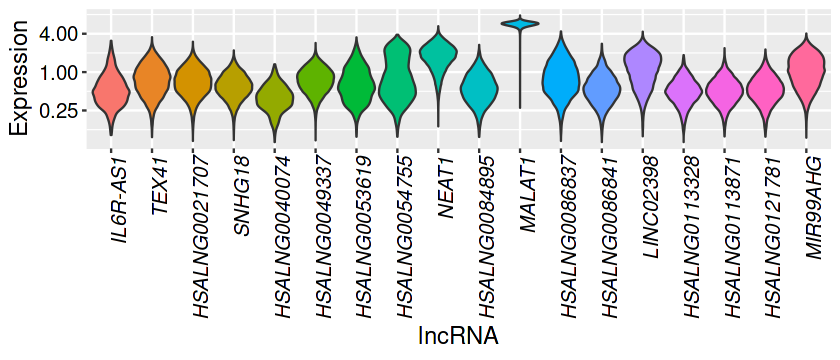

In [11]:
options(repr.plot.width=7, repr.plot.height=3)
library(scales)
ggplot(gwaslnc_exp, aes(x=Var1, y=value,fill=Var1))+ 
	geom_violin(scale = "width")+
    scale_y_continuous(trans = log2_trans())+
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu")))+
	labs( 
		y="Expression",
		x="lncRNA")+
	theme(
		axis.text.y = element_text(size=12,color='black'),
		axis.text.x = element_text(size=12,angle=90,hjust=1,color='black',face='italic'),
        axis.title.y = element_text(size=14),
		axis.title.x = element_text(size=14),
        legend.position="none",
		plot.title = element_blank()
	)


In [267]:
dat<- dat[seq(dim(dat)[1],1),]
dat<-transform(dat,V1=factor(V1,levels=rev(unique(V1))))

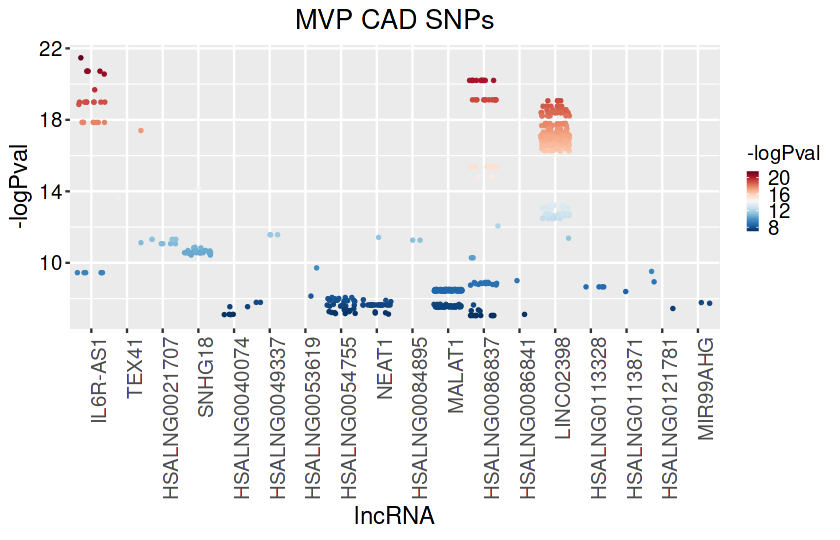

In [276]:
options(repr.plot.width=7, repr.plot.height=4.5)
ggplot(dat, aes(x=V1, y=V7))+ 
	#geom_boxplot(outliers = F)+
    geom_jitter(size=0.5,aes(color=V7))+
    scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu")))+
	labs( 
		y="-logPval",
		x="lncRNA",
		color='-logPval',
		title="MVP CAD SNPs")+
	theme(
		axis.text.y = element_text(size=12,color='black'),
		axis.text.x = element_text(size=12,angle=90,hjust=1),
		axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14),
		legend.key.size = unit(0.1,"inches"),
		legend.text = element_text(size=12),
		legend.title = element_text(size=12),
		legend.background = element_rect(fill="transparent"),
		plot.title = element_text(hjust = 0.5,size=16)
	)
